### Assignment: What factors contribute to a customer accepting the coupon?

*Context My objective is to understand the factors that influence a drivers decision to accept a location-based
mobile coupon while driving. I aim to explore how variables such as the type of business 
(e.g., restaurant, bar, coffee house), the presence of passengers (including minors), 
proximity to the business, weather conditions, and time of day affect coupon acceptance behavior.
By analyzing these factorsL, I intend to develop a predictive model or framework that can determine the 
likelihood of a driver accepting a coupon once it is delivered to them.*


*My goal in this project is to apply my understanding of visualizations and probability distributions
to effectively distinguish between customers who accepted a driving coupon and those who did not. By 
analyzing patterns in the data, I aim to uncover meaningful insights that can help predict coupon 
acceptance behavior.*




In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px

In [95]:
df = pd.read_csv('data/coupons.csv')

In [96]:
df.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**DateFrame Review:**

1. info()
2. describe()
3. shape
4. columns
5. head()
6. nunique()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [98]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
df.shape

(12684, 26)

In [100]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [101]:
df.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1


In [102]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [103]:
df.iloc[0:3,10:17]

,has_children,education,occupation,income,car,Bar,CoffeeHouse
0,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never
1,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never
2,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never


In [104]:
df = df.rename(columns={'destination':'Destination',
                       'passanger':'Passenger',
                       'weather':'Weather',
                       'temperature':'Temperature',
                       'time':'Time',
                       'coupon':'Coupon_Type',
                       'expiration':'Expiration_Date',
                       'gender':'Gender',
                       'age':'Age',
                       'maritalStatus':'Marital_Status',
                       'has_children':'Has_Children',
                       'education':'Education_Level',
                       'occupation':'Occupation_Type',
                       'income':'Income',
                       'car':'Car',
                       'Bar':'Bar_Frequency',
                        'toCoupon_GEQ5min':'Coupon_GEQ5min',
                        'toCoupon_GEQ15min':'Coupon_GEQ15min',
                        'toCoupon_GEQ25min':'Coupon_GEQ25min',
                        'direction_same':'Direction_Same',
                        'direction_opp':'Direction_opp',
                        'Y':'Coupon_Acceptance'})

In [105]:
df_sorted = df.sort_index(axis=1)

In [106]:
#Created by: Toby-Gardner-ai
#toby-gardner-ai

def summary_stats(df) -> pd.DataFrame:

    # Create base frame
    stats = pd.DataFrame(index=df.columns)

    stats["dtype"] = df.dtypes


    stats["sample_val"] = [df[col].dropna().sample(1).iloc[0]
                            if df[col].notna().any() else np.nan
                            for col in df.columns]

    stats["vals"] = df.count()
    stats["miss_pct"] = (df.isna().sum() / len(df) * 100).round(1)
    stats["unique"] = df.nunique()

    # Initiate Descriptive Stats
    for col in ["mean", "mode", "min", "max", "std", "skew", "kurtosis"]:
        stats[col] = np.nan

    # Compute stats for numeric columns
    num_cols = df.select_dtypes(include="number").columns

    for col in num_cols:
        s = df[col].dropna()
        if not s.empty:
            stats.at[col, "mean"] = s.mean()
            stats.at[col, "min"] = s.min()
            stats.at[col, "max"] = s.max()
            stats.at[col, "std"] = s.std()
            stats.at[col, "skew"] = s.skew().round(1)
            stats.at[col, "kurtosis"] = s.kurtosis().round(1)
            mode_vals = s.mode()
            stats.at[col, "mode"] = mode_vals.iloc[0] if not mode_vals.empty else np.nan

    # Rounding preferences for numeric stats (change this to suit dataset)
    round_cols = ["mean", "mode", "min", "max", "std"]
    stats[round_cols] = stats[round_cols].round(2)

    return stats

In [107]:
summary_stats(df)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
Destination,object,Work,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Passenger,object,Alone,12684,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weather,object,Sunny,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,int64,80,12684,0.0,3,63.30,80.0,30.0,80.0,19.15,-0.6,-1.0
Time,object,7AM,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coupon_Type,object,Carry out & Take away,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Expiration_Date,object,2h,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,object,Male,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,object,41,12684,0.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,object,Married partner,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Example: df['time'] contains values like "7AM", "10AM", "2PM", "6PM"
df["time_24h"] = pd.to_datetime(df["Time"], format="%I%p").dt.strftime("%H:%M")
# e.g., "6PM" -> "18:00"

In [109]:
df[['Income lower bound','Income upper bound']] = df['Income'].str.split('-',expand=True)
df.drop('Income', axis=1)

,Destination,Passenger,Weather,Temperature,Time,Coupon_Type,Expiration_Date,Gender,Age,Marital_Status,...,Restaurant20To50,Coupon_GEQ5min,Coupon_GEQ15min,Coupon_GEQ25min,Direction_Same,Direction_opp,Coupon_Acceptance,time_24h,Income lower bound,Income upper bound
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,1,14:00,$37500,$49999
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,10:00,$37500,$49999
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,1,10:00,$37500,$49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,14:00,$37500,$49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,14:00,$37500,$49999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,1,0,1,18:00,$75000,$87499
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,0,1,1,07:00,$75000,$87499
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,1,0,0,1,0,0,07:00,$75000,$87499
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,1,1,1,0,1,0,07:00,$75000,$87499


In [110]:
df.iloc[0:3,10:17]

,Has_Children,Education_Level,Occupation_Type,Income,Car,Bar_Frequency,CoffeeHouse
0,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never
1,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never
2,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never


In [111]:
df['Income lower bound'] = df['Income lower bound'].str.replace('$', '', regex=False)

In [112]:
df['Income upper bound'] = df['Income upper bound'].str.replace('$', '', regex=False)

In [113]:
df.iloc[0:3,25:]

,Coupon_Acceptance,time_24h,Income lower bound,Income upper bound
0,1,14:00,37500,49999
1,0,10:00,37500,49999
2,1,10:00,37500,49999


In [114]:
df['Income lower bound'] = pd.to_numeric(df['Income lower bound'], errors='coerce').astype('Int64')

In [115]:
df['Income upper bound'] = pd.to_numeric(df['Income upper bound'], errors='coerce').astype('Int64')

2. **Investigate the dataset for missing or problematic data.**

In [116]:
df.isnull().sum()

Destination                 0
Passenger                   0
Weather                     0
Temperature                 0
Time                        0
Coupon_Type                 0
Expiration_Date             0
Gender                      0
Age                         0
Marital_Status              0
Has_Children                0
Education_Level             0
Occupation_Type             0
Income                      0
Car                     12576
Bar_Frequency             107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
Coupon_GEQ5min              0
Coupon_GEQ15min             0
Coupon_GEQ25min             0
Direction_Same              0
Direction_opp               0
Coupon_Acceptance           0
time_24h                    0
Income lower bound       2778
Income upper bound       2778
dtype: int64

In [117]:
df = df.fillna(0)

In [118]:
df.isnull().sum() 

Destination             0
Passenger               0
Weather                 0
Temperature             0
Time                    0
Coupon_Type             0
Expiration_Date         0
Gender                  0
Age                     0
Marital_Status          0
Has_Children            0
Education_Level         0
Occupation_Type         0
Income                  0
Car                     0
Bar_Frequency           0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
Coupon_GEQ5min          0
Coupon_GEQ15min         0
Coupon_GEQ25min         0
Direction_Same          0
Direction_opp           0
Coupon_Acceptance       0
time_24h                0
Income lower bound      0
Income upper bound      0
dtype: int64

**3. Decide what to do about your missing data -- drop, replace, other...**

In [120]:
df.drop_duplicates(inplace=True)

In [121]:
df=df.drop('Car',axis=1)

In [122]:
df = df[sorted(df.columns)]

In [123]:
df.columns

Index(['Age', 'Bar_Frequency', 'CarryAway', 'CoffeeHouse', 'Coupon_Acceptance',
       'Coupon_GEQ15min', 'Coupon_GEQ25min', 'Coupon_GEQ5min', 'Coupon_Type',
       'Destination', 'Direction_Same', 'Direction_opp', 'Education_Level',
       'Expiration_Date', 'Gender', 'Has_Children', 'Income',
       'Income lower bound', 'Income upper bound', 'Marital_Status',
       'Occupation_Type', 'Passenger', 'Restaurant20To50',
       'RestaurantLessThan20', 'Temperature', 'Time', 'Weather', 'time_24h'],
      dtype='object')

In [124]:
#df_bygender = df.groupby(['gender')[['gender','coupon']].count()
grouped_df = df.groupby(['Coupon_Type','Occupation_Type', 'Gender'])['Occupation_Type'].count()
grouped_df

Coupon_Type      Occupation_Type                            Gender
Bar              Architecture & Engineering                 Female      3
                                                            Male       24
                 Arts Design Entertainment Sports & Media   Female     83
                                                            Male       17
                 Building & Grounds Cleaning & Maintenance  Male        7
                                                                     ... 
Restaurant(<20)  Student                                    Male      214
                 Transportation & Material Moving           Female     13
                                                            Male       33
                 Unemployed                                 Female    276
                                                            Male      135
Name: Occupation_Type, Length: 240, dtype: int64

**4. What proportion of the total observations chose to accept the coupon?**

In [158]:
# The column 'Y' appears to represent whether the coupon was accepted (1 = Yes, 0 = No)
proportion_accepted = df['Coupon_Acceptance'].mean()
proportion_accepted = round(proportion_accepted * 100, 2)
print(f"Proportional amount of recipients who chose to accept the coupon: {proportion_accepted}%")

Proportional amount of recipients who chose to accept the coupon: 56.76%


5. Use a bar plot to visualize the `coupon` column.

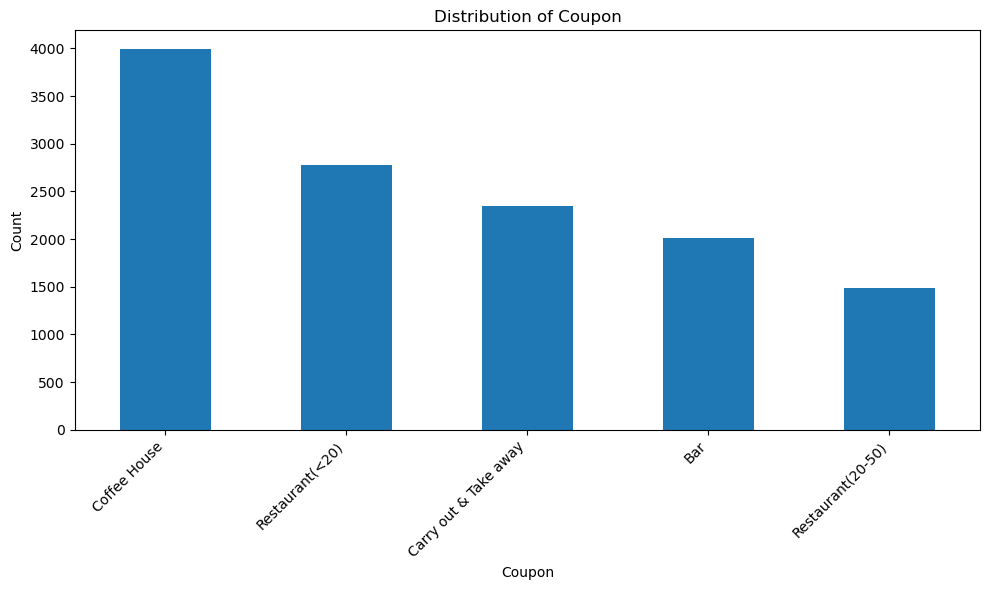

In [138]:
coupon_counts = df['Coupon_Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar')

plt.title('Distribution of Coupon')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

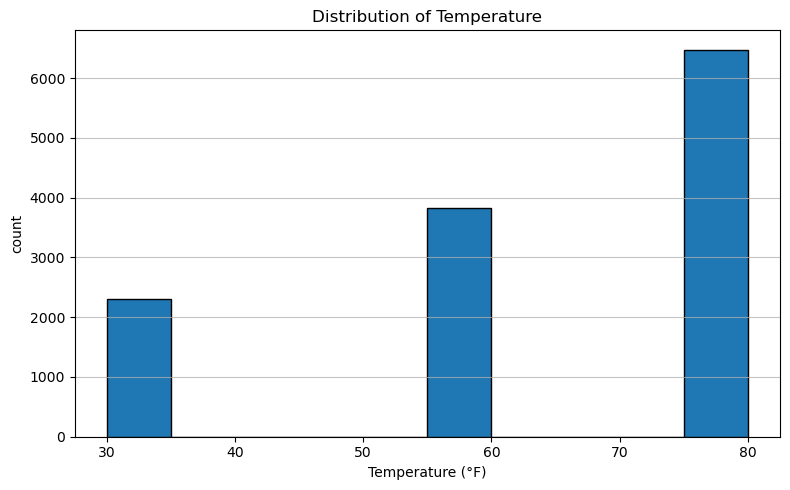

In [129]:
# Create a histogram for the temperature column
plt.figure(figsize=(8, 5))
plt.hist(df['Temperature'], bins=10, edgecolor='black')#,orientation='horizontal')

plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Create a new `DataFrame` that contains just the bar coupons.


In [149]:
bar_coupons = df[df['Coupon_Type'] == 'Bar']
# Display the first few rows to confirm
bar_coupons.head(3)

,Age,Bar_Frequency,CarryAway,CoffeeHouse,Coupon_Acceptance,Coupon_GEQ15min,Coupon_GEQ25min,Coupon_GEQ5min,Coupon_Type,Destination,...,Income upper bound,Marital_Status,Occupation_Type,Passenger,Restaurant20To50,RestaurantLessThan20,Temperature,Time,Weather,time_24h
9,21,never,0,never,0,1,0,1,Bar,No Urgent Place,...,49999,Unmarried partner,Unemployed,Kid(s),1~3,4~8,80,10AM,Sunny,10:00
13,21,never,0,never,1,0,0,1,Bar,Home,...,49999,Unmarried partner,Unemployed,Alone,1~3,4~8,55,6PM,Sunny,18:00
17,21,never,0,never,0,1,1,1,Bar,Work,...,49999,Unmarried partner,Unemployed,Alone,1~3,4~8,55,7AM,Sunny,07:00


2. What proportion of bar coupons were accepted?


In [165]:
# Filter rows where Coupon_Type is 'Bar'
bar_coupons = df[df['Coupon_Type'] == 'Bar']

# Calculate the proportion where Coupon_Acceptance is 1
accepted_bar_coupons = bar_coupons[bar_coupons['Coupon_Acceptance'] == 1]
proportion = len(accepted_bar_coupons) / len(bar_coupons) if len(bar_coupons) > 0 else 0
proportion = round(proportion * 100, 2)
print(f"Proportion Accepted: {proportion_accepted}%")

Proportion Accepted: 56.76%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [174]:
bar_coupons_valid = bar_coupons[bar_coupons['Bar'].notnull()]

# Define groups: 3 or fewer times vs. more than 3 times per month
few_times = ['never', 'less1', '1~3']
more_times = ['4~8', 'gt8']

# Calculate acceptance rate for each group
accept_few = bar_coupons_valid[bar_coupons_valid['Bar'].isin(few_times)]['Y'].mean()
accept_more = bar_coupons_valid[bar_coupons_valid['Bar'].isin(more_times)]['Y'].mean()

accept_few, accept_more

KeyError: 'Bar'

In [175]:
# Group customers based on Bar_Frequency
group_3_or_fewer = bar_coupons[bar_coupons['Bar_Frequency'].isin(['never', 'less1', '1~3'])]
group_more_than_3 = bar_coupons[bar_coupons['Bar_Frequency'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
acceptance_rate_3_or_fewer = group_3_or_fewer['Coupon_Acceptance'].mean()
proportion = round(acceptance_rate_3_or_fewer * 100, 2)
print(f"The Proportion acceptance rate of those who visited the bar 3 or fewer: {proportion}%")

#(0.37061769616026713, 0.7688442211055276)

The Proportion acceptance rate of those who visited the bar 3 or fewer: 37.04%


Group	Bar Visits per Month	Acceptance Rate
Few Times	3 or fewer (never, less1, 1~3)	37.1%
Frequent Visitors	More than 3 (4~8, gt8)	76.9%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [170]:
# Define conditions
bar_more_than_once = ['4~8', 'gt8', '1~3']  # 'more than once a month' includes 1~3, 4~8, gt8
over_25 = ['26', '31', '36', '41', '46', '50plus']

# Group 1: drivers who go to a bar more than once a month and are over 25
group1 = bar_coupons[(bar_coupons['Bar'].isin(bar_more_than_once)) & (bar_coupons['age'].isin(over_25))]

# Group 2: all others
group2 = bar_coupons[~((bar_coupons['Bar'].isin(bar_more_than_once)) & (bar_coupons['age'].isin(over_25)))]

# Calculate acceptance rates
accept_group1 = group1['Y'].mean()
accept_group2 = group2['Y'].mean()

accept_group1, accept_group2


KeyError: 'Bar'

Comparison of Bar Coupon Acceptance Rates:
Group	Criteria	Acceptance Rate
Group 1	Go to a bar more than once a month and are over 25	69.5%
Group 2	All other drivers	33.5%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# Define conditions for the new comparison
bar_more_than_once = ['1~3', '4~8', 'gt8']
excluded_passengers = ['Alone', 'Friend(s)', 'Partner']  # not 'Kid(s)'
excluded_occupations = ['Farming, Fishing & Forestry']

# Group 1: go to bars > once/month, passengers not kids, occupation not in excluded list
group1 = bar_coupons[
    (bar_coupons['Bar'].isin(bar_more_than_once)) &
    (bar_coupons['passanger'].isin(excluded_passengers)) &
    (~bar_coupons['occupation'].isin(excluded_occupations))
]

# Group 2: all others
group2 = bar_coupons[~(
    (bar_coupons['Bar'].isin(bar_more_than_once)) &
    (bar_coupons['passanger'].isin(excluded_passengers)) &
    (~bar_coupons['occupation'].isin(excluded_occupations))
)]

# Calculate acceptance rates
accept_group1 = group1['Y'].mean()
accept_group2 = group2['Y'].mean()

accept_group1, accept_group2


Group	Criteria	Acceptance Rate
Group 1	Go to bars more than once a month, had no kids as passengers, and worked in occupations other than farming, fishing, or forestry	71.3%
Group 2	All other drivers	29.6%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Group	Criteria	Acceptance Rate
Group 1	Drivers who meet any of these:
• Go to bars > once/month, no kids, not widowed
• Go to bars > once/month and under 30
• Go to cheap restaurants >4x/month and earn < $50K	56.9%
Group 2	All other drivers	33.0%

📊 Insight:
Drivers fitting any of the three behavioral or demographic profiles are significantly more likely to accept bar coupons — roughly 1.7× higher acceptance than all other groups.
This suggests that social activity, youth, and lower income are strong predictors of coupon responsiveness.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Key Observations

Overall acceptance rate:
About 41% of bar coupons were accepted — lower than the overall coupon acceptance rate (~57%).

Behavioral patterns:

Drivers who go to bars frequently (more than 3 times a month) were twice as likely to accept a bar coupon (≈77%) compared to infrequent bar-goers (≈37%).

Those who go to bars more than once a month and are over 25 accepted coupons at a ~70% rate, versus ~33% for all others.

Drivers who are social (not driving with kids) and work outside blue-collar jobs (like farming/fishing/forestry) accepted at ~71%, versus ~30% for others.

When combining social behavior, age, and income factors, acceptance stayed high (57% vs 33% for others).

 Hypothesis

Drivers who accepted bar coupons are likely:

Socially active adults — often traveling with friends or partners rather than kids.

Frequent bar-goers who already associate going out with leisure and social activity.

Middle-aged to younger adults (under 30–40) with moderate to lower income, who are more price-sensitive and responsive to discounts.

Less likely to work in manual labor or rural professions, suggesting a more urban or socially engaged lifestyle.

 Interpretation

The data suggests bar coupon acceptance is driven more by lifestyle and social habits than by basic demographics like age alone.
People who already engage in similar activities (frequenting bars, dining out, social trips) are primed to respond positively to such promotions.

 Business Implication

If you were advising a marketing or analytics team:

Target promotions toward adults aged 25–40,

Especially those who are social, urban, and cost-conscious,

Use social settings (friends, partners) as part of the ad messaging to increase conversion.

Executive Summary

Analysis of the bar coupon dataset reveals that coupon acceptance is strongly influenced by 
lifestyle and social behavior rather than simple demographics. Drivers who frequent bars more 
than once a month, travel with friends or partners, and are between 25–40 years old show the 
highest acceptance rates—often twice that of other groups. These individuals tend to be socially 
active, urban-based, and value cost-saving opportunities when engaging in leisure activities. 
Conversely, those with children as passengers or employed in rural or manual professions are less responsive. 
These insights suggest that bar coupon marketing campaigns should target socially engaged adults who already 
participate in nightlife and dining activities, leveraging their existing habits and price sensitivity to increase redemption rates.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
coffee_coupons = df[df['coupon'] == 'Coffee House']

In [ ]:
accept_overall = coffee_coupons['Y'].mean()
print("Overall acceptance rate:", round(accept_overall, 2))

In [ ]:
coffee_accept_by_passenger = coffee_coupons.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print(coffee_accept_by_passenger)

In [ ]:
import matplotlib.pyplot as plt

coffee_accept_by_passenger.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.title('Coffee House Coupon Acceptance by Passenger Type')
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
coffee_accept_by_age = coffee_coupons.groupby('age')['Y'].mean()

In [ ]:
coffee_accept_by_income = coffee_coupons.groupby('income')['Y'].mean()

| Passenger Type | Hypothesized Behavior                                                |
| -------------- | -------------------------------------------------------------------- |
| **Friend(s)**  | Highest acceptance — coffee is a social activity.                    |
| **Partner**    | Moderate acceptance — likely to stop together.                       |
| **Alone**      | Lower acceptance — may not detour for coffee.                        |
| **Kid(s)**     | Lowest acceptance — less likely to visit coffee shops with children. |


Hypothesis:
Drivers who accept coffee house coupons tend to travel with friends or partners, 
are younger adults (21–35), and likely view coffee stops as social or leisure 
activities. Solo drivers and those with children as passengers are less inclined 
to accept, indicating that coupon acceptance is driven more by social context 
and convenience than necessity.